# Analisis Data: Produksi Padi di Aceh
Notebook ini berisi proses pembersihan, eksplorasi, transformasi, visualisasi, dan penyimpanan data produksi padi di Provinsi Aceh.

In [ ]:
# 1. Loading Data
import pandas as pd

df = pd.read_csv('sample_data/data_padi_aceh.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Eksplorasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        28 non-null     object 
 1   Tahun           28 non-null     int64  
 2   Produksi        28 non-null     float64
 3   Luas Panen      28 non-null     float64
 4   Curah hujan     28 non-null     float64
 5   Kelembapan      28 non-null     float64
 6   Suhu rata-rata  28 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,28.000000,2.800000e+01,28.000000,28.000000,28.000000,28.000000
mean,2006.500000,1.618737e+06,347109.523214,1485.753571,80.500357,27.032143
std,8.225975,3.161083e+05,37447.107010,377.642109,4.565258,1.003595
min,1993.000000,1.246614e+06,293067.000000,506.500000,68.750000,25.410000
25%,1999.750000,1.397442e+06,322889.000000,1290.200000,79.475000,26.455000
50%,2006.500000,1.540434e+06,338573.000000,1514.100000,81.120000,26.900000
75%,2013.250000,1.776906e+06,366328.000000,1642.425000,82.737500,27.100000
max,2020.000000,2.478922e+06,461060.000000,2264.400000,90.600000,29.400000


In [ ]:
# 3. Deteksi dan Penanganan Missing Value dan Duplikasi
print("Missing values:\n", df.isnull().sum())
print("\nJumlah data duplikat:", df.duplicated().sum())

# Tangani missing value dengan mean
df.fillna(df.mean(numeric_only=True), inplace=True)
# Hapus duplikasi jika ada
df.drop_duplicates(inplace=True)

Missing values:
 Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

Jumlah data duplikat: 0


In [ ]:
# 4. Transformasi Data Numerik (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,0.067290,0.181686,0.637408,0.606407,0.162907
1,Aceh,1994,0.043078,0.214140,0.577109,0.611899,0.378446
2,Aceh,1995,0.110598,0.274928,0.551510,0.639359,0.215539
3,Aceh,1996,0.139993,0.328323,0.597588,0.652174,0.167920
4,Aceh,1997,0.098563,0.264856,0.473576,0.627460,0.225564


In [ ]:
# 5. Diskretisasi Tahun menjadi Dekade
df['Dekade'] = pd.cut(df['Tahun'],
                     bins=[1990, 1999, 2009, 2019, 2029],
                     labels=["1990-an", "2000-an", "2010-an", "2020-an"])
df[['Tahun', 'Dekade']].head()

,Tahun,Dekade
0,1993,1990-an
1,1994,1990-an
2,1995,1990-an
3,1996,1990-an
4,1997,1990-an


from matplotlib import pyplot as plt
_df_0['Tahun'].plot(kind='hist', bins=20, title='Tahun')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tahun']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tahun'}, axis=1)
              .sort_values('Tahun', ascending=True))
  xs = counted['Tahun']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['Tahun'].plot(kind='line', figsize=(8, 4), title='Tahun')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 6. Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

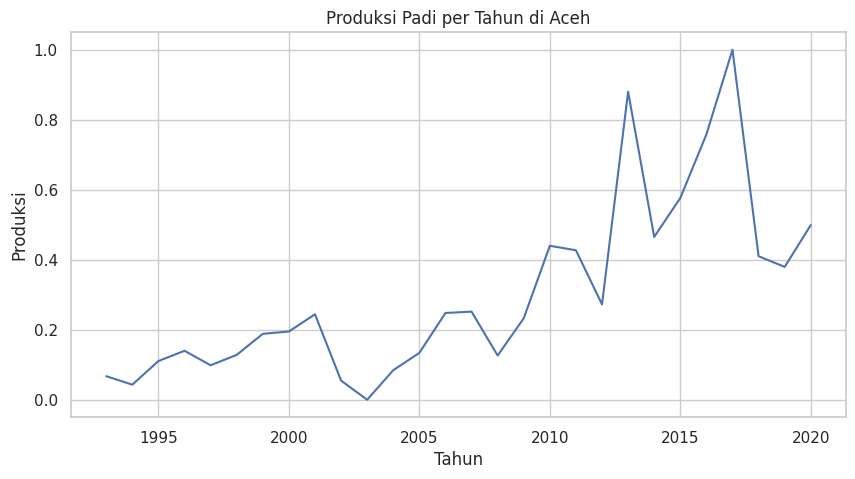

In [ ]:
# Visualisasi 1: Produksi Padi per Tahun
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Tahun', y='Produksi')
plt.title('Produksi Padi per Tahun di Aceh')
plt.show()

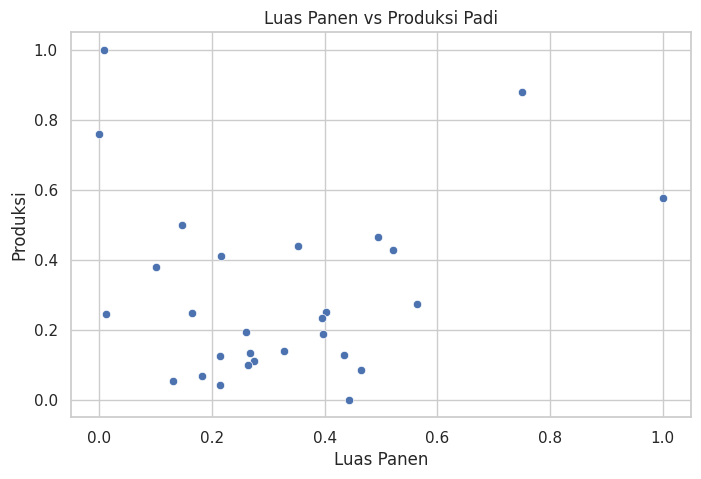

In [ ]:
# Visualisasi 2: Hubungan Luas Panen dan Produksi
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Luas Panen', y='Produksi')
plt.title('Luas Panen vs Produksi Padi')
plt.show()

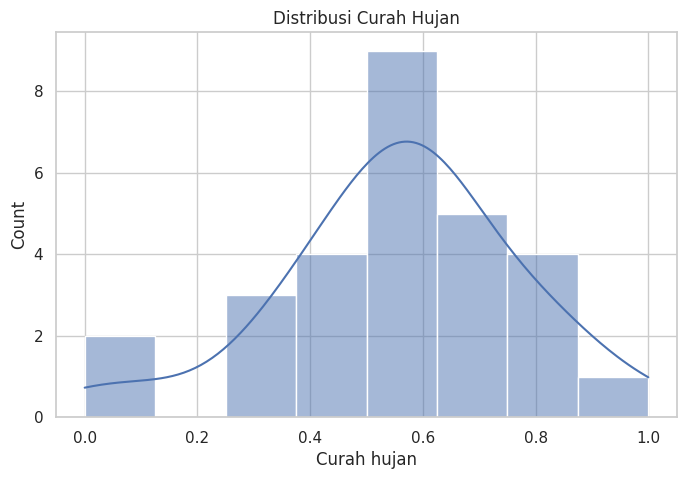

In [ ]:
# Visualisasi 3: Distribusi Curah Hujan
plt.figure(figsize=(8,5))
sns.histplot(df['Curah hujan'], kde=True)
plt.title('Distribusi Curah Hujan')
plt.show()

In [ ]:
# 7. Simpan Data Hasil Preprocessing
df.to_csv('data_padi_aceh_preprocessed.csv', index=False)
print("Data berhasil disimpan.")

Data berhasil disimpan.
